# Updated LSCSM/Volterra analysis and comparison of 0212RIGHT_M22 and 0212RIGHT_M25

Margot Larroche, March 11 2016

In [1]:
# Setting up
%matplotlib inline
workingdir='/DATA/Margot/ProjetsGit/'
import os
os.chdir(workingdir)
import numpy as np
import os
import filecmp
import glob
from lscsm_adapt.loadandsave import restoreLSCSM_mgt
from lscsm_adapt.visualizationMgt import plotLSCSM, plotWeights, plotRFampl, plotThresholds
from lscsm_adapt.computeReceptiveFields import *
from lscsm.checkpointing import loadVec

In [3]:
# Looking for already computed LSCSM fits to the data
resultfiles=glob.glob(resultspath+'0212RIGHT_M22'+'*_K')
for filename in resultfiles:
    print filename

/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/FittingResults/0212RIGHT_M22_DTon_unsorted_workswell_tau2_K
/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/FittingResults/0212RIGHT_M22_DTon_unsorted_workswell_tau2_pix15_K
/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/FittingResults/0212RIGHT_M22_DTon_unsorted_SNlgnfixedtosame_K
/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/FittingResults/0212RIGHT_M22_DTon_unsorted_nonlgnfixedtoDN_K
/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/FittingResults/0212RIGHT_M22_DTon_unsorted_bigepochsize_K
/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/FittingResults/0212RIGHT_M22_DTon_unsorted_bigepochsize2_K
/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/FittingResults/0212RIGHT_M22_DTon_unsorted_bigepochsize3_K
/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/FittingResults/0212RIGHT_M22_DTon_unsorted_smallepochsize_K
/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/FittingResults/0212RIGHT_M22_DTon_unsorted_bigepochsize4_K
/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/FittingResults/0

In [16]:
# Listing metaparameters associated to each file
bigepochsize_mpfiles=glob.glob(resultspath+'0212RIGHT_M22'+'*bigepochsize*_metaparams')
for filename in bigepochsize_mpfiles:
    with open(filename,'r') as f:
        print filename
        print ''
        print f.read()
        print ''

/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/FittingResults/0212RIGHT_M22_DTon_unsorted_bigepochsize_metaparams

meta_params = {
'LGN_treshold': False,
 'balanced_LGN': False,
 'error_function': 'LogLikelyhood',
 'lgn_gain_bounds': (0.0, 10.0),
 'lgn_pos_bound': 2,
 'lgn_size_bounds': (1, 25),
 'lgnof': 'Linear',
 'log_loss_coefficient': 1.0,
 'maximum_weight_l1': 1,
 'maximum_weight_l2': 1,
 'name': 'bigepochsize',
 'negative_lgn': True,
 'num_hidden': 20,
 'num_lgn': 10,
 'second_layer': True,
 'threshold_bounds': (-20, 20),
 'v1of': 'LogisticLoss'}

suppl_params = {
'datafilename': '0212RIGHT_M22_DTon_unsorted.mat',
 'date': '2016-02-09-15:43:46',
 'epochSize': 1000,
 'n_rep': 10000,
 'numEpochs': 10,
 'seed': 11,
 'stimsize': 30.0,
 'tau': 2,
 'val_frac': 0.2}



/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/FittingResults/0212RIGHT_M22_DTon_unsorted_bigepochsize2_metaparams

meta_params = {
'LGN_treshold': False,
 'balanced_LGN': False,
 'error_function': 'LogLikelyhood',
 'lgn_gain_

In [13]:
# Plotting the LSCSM models corresponding to these updated fits:
prefixSN='0212RIGHT_M22_DTon_unsorted_bigepochsize5'
prefixDN='0212RIGHT_M25_DTon_unsorted_bigepochsize5'
lscsmSN,KSN,spSN,tiSN,tsSN,viSN,vsSN=restoreLSCSM_mgt(prefixSN,resetK=False,datapath=datapath,resultspath=resultspath)
lscsmDN,KDN,spDN,tiDN,tsDN,viDN,vsDN=restoreLSCSM_mgt(prefixDN,resetK=False,datapath=datapath,resultspath=resultspath)

In [23]:
lgn_rf,hidden_rf,modelSTA=plotLSCSM(lscsmSN,KSN,tiSN)

/usr/local/lib/python2.7/dist-packages/theano/scan_module/scan_perform_ext.py:133: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


In [26]:
lgn_rf,hidden_rf,modelSTA=plotLSCSM(lscsmDN,KDN,tiDN)

In [4]:
# Look for already computed Volterra
rffiles=glob.glob(RFpath+'0212RIGHT_M22'+'*volt2*')
for filename in rffiles:
    if filename[-4:]!='.png':
        print filename

print ''    
rffiles=glob.glob(RFpath+'0212RIGHT_M25'+'*volt2*')
for filename in rffiles:
    if filename[-4:]!='.png':
        print filename

/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/ReceptiveFields/0212RIGHT_M22_DTon_unsorted_volt2diag_ntau1_tau2
/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/ReceptiveFields/0212RIGHT_M22_DTon_unsorted_workswell_tau2_volt2diag_ntau1_tau2

/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/ReceptiveFields/0212RIGHT_M25_DTon_unsorted_volt2diag_ntau1_tau2
/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/ReceptiveFields/0212RIGHT_M25_DTon_unsorted_workswell_tau2_volt2diag_ntau1_tau2
/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/ReceptiveFields/0212RIGHT_M25_DTon_unsorted_volt2_ntau1_tau2_BIS
/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/ReceptiveFields/0212RIGHT_M25_DTon_unsorted_volt2_ntau1_tau2_3_-4_4_-3
/DATA/Margot/ownCloud/MargotUNIC/LSCSM_data/ReceptiveFields/0212RIGHT_M25_DTon_unsorted_volt2_ntau1_tau2


In [14]:
rfsSN=computeReceptiveFields('0212RIGHT_M22_DTon_unsorted.mat',spSN['val_frac'],ntau=1,tau=spSN['tau'],minStimSize=1,STA_lb=None,volt1=False,volt2=False,volt2diag=True,datapath=datapath,outpath=RFpath,suffix='_test')

In [38]:
# Compare with previously computed file
filecmp.cmp(RFpath+'0212RIGHT_M22_DTon_unsorted_volt2diag_ntau1_tau2',RFpath+'0212RIGHT_M22_DTon_unsorted_volt2diag_ntau1_tau2_test')

False

In [61]:
RFsSNold=loadRF('0212RIGHT_M22_DTon_unsorted.mat','volt2diag',modelName='',ntau=1,tau=2,suffix='',RFpath=RFpath)
print np.corrcoef(RFsSNold[0],rfsSN[0])[0,1]
print abs(RFsSNold[0]-rfsSN[0]).mean()
print np.corrcoef(RFsSNold[1].reshape(-1),rfsSN[1].reshape(-1))[0,1]
print abs(RFsSNold[0]-rfsSN[0]).mean()
print np.corrcoef(RFsSNold[1].reshape(-1),rfsSN[1].reshape(-1))[0,1]
print abs(RFsSNold[0]-rfsSN[0]).mean()

1.0
1.58324010369e-16
1.0
1.58324010369e-16
1.0
1.58324010369e-16


In [63]:
# Delete the redundant file to avoid further confusion
os.remove(RFpath+'0212RIGHT_M22_DTon_unsorted_volt2diag_ntau1_tau2_test')

In [17]:
# Same test with Volterra2diag on 0212RIGHT_M25
rfsDN=computeReceptiveFields('0212RIGHT_M25_DTon_unsorted.mat',spDN['val_frac'],ntau=1,tau=spDN['tau'],minStimSize=1,STA_lb=None,volt1=False,volt2=False,volt2diag=True,datapath=datapath,outpath=RFpath,suffix='_test')

In [18]:
# Original file accidentally deleted, but the conclusion was the same as for M22. Renaming the new file to original name:
os.rename(RFpath+'0212RIGHT_M25_DTon_unsorted_volt2diag_ntau1_tau2_test',RFpath+'0212RIGHT_M25_DTon_unsorted_volt2diag_ntau1_tau2')

In [26]:
# Open the full second order Volterra for DN
volt2DN=loadRF('0212RIGHT_M25_DTon_unsorted.mat','volt2',modelName='',ntau=1,tau=2,suffix='_3_-4_4_-3',RFpath=RFpath)
print volt2DN[0].shape
print volt2DN[1].shape
print volt2DN[2].shape

(1, 32)
(64, 32)
(2080, 32)


In [24]:
print filecmp.cmp(RFpath+'0212RIGHT_M25_DTon_unsorted_volt2_ntau1_tau2_3_-4_4_-3',RFpath+'0212RIGHT_M25_DTon_unsorted_volt2_ntau1_tau2_BIS')
volt2DNold=loadRF('0212RIGHT_M25_DTon_unsorted.mat','volt2',modelName='',ntau=1,tau=2,suffix='_BIS',RFpath=RFpath)
print volt2DNold[0].shape
print volt2DNold[1].shape
print volt2DNold[2].shape

False
(1, 32)
(64, 32)
(2080, 32)


In [25]:
print np.corrcoef(volt2DNold[0],volt2DN[0])[0,1]
print abs(volt2DNold[0]-volt2DN[0]).mean()
print np.corrcoef(volt2DNold[1].reshape(-1),volt2DN[1].reshape(-1))[0,1]
print abs(volt2DNold[0]-volt2DN[0]).mean()
print np.corrcoef(volt2DNold[1].reshape(-1),volt2DN[1].reshape(-1))[0,1]
print abs(volt2DNold[0]-volt2DN[0]).mean()

0.999984429707
0.00171007809118
-0.178430848246
0.00171007809118
-0.178430848246
0.00171007809118


In [8]:
# Open same thing with full stim size (just computed on the cluster)
volt2DNfull=loadRF('0212RIGHT_M25_DTon_unsorted.mat','volt2',modelName='',ntau=1,tau=2,suffix='',RFpath=RFpath)
print volt2DNfull[0].shape
print volt2DNfull[1].shape
print volt2DNfull[2].shape

(1, 32)
(225, 32)
(25425, 32)


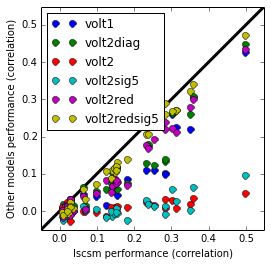

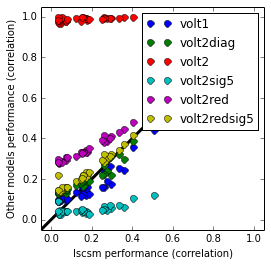

In [4]:
# Load RF correlation values for 0212RIGHT_M25 computed using spyder and plot them
legends=['lscsm','volt1','volt2diag','volt2','volt2sig5','volt2red','volt2redsig5']
corrV=loadVec(RFpath+'0212RIGHT_M25_DTon_unsorted_compareRF_LscsmV1V2dV2V2sigV2rV2rsig_ntau1_tau2').reshape(8,33)
corrT=loadVec(RFpath+'0212RIGHT_M25_DTon_unsorted_compareRF_training_LscsmV1V2dV2V2sigV2rV2rsig_ntau1_tau2').reshape(8,33)
fig=plotRFcorr_xy(corrV,legends)
fig=plotRFcorr_xy(corrT,legends,legend_pos='upper right')

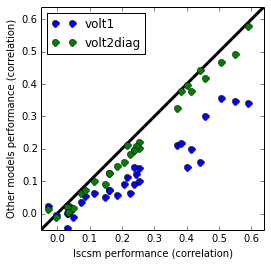

In [7]:
# Same thing with the sparse noise data (no full volt2 this time):
legends=['lscsm','volt1','volt2diag']
corrV=loadVec(RFpath+'0212RIGHT_M22_DTon_unsorted_compareRF_LscsmV1V2d_ntau1_tau2').reshape(4,33)
fig=plotRFcorr_xy(corrV,legends)